## Mulinomial Classification 예제
### BMI 데이터를 이용한 다중분류

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# raw data loading
df = pd.read_csv('./data/bmi/bmi.csv', skiprows=3)
df

,label,height,weight
0,1,188,71
1,2,161,68
2,0,178,52
3,2,136,63
4,1,145,52
...,...,...,...
19995,0,163,48
19996,2,139,70
19997,1,150,48
19998,1,189,69


In [2]:
# 데이터 전처리
# 1. 결측치 확인
df.isnull().sum()

label     0
height    0
weight    0
dtype: int64

In [ ]:
# 2. 이상치 확인 - boxplot
# 3. 데이터의 편향성 확인

In [3]:
x_train, x_test, t_train, t_test = \
train_test_split(df[['height', 'weight']].values,
                 df['label'].values.reshape(-1,1),
                 test_size=0.3,
                 random_state=0)

In [4]:
# 데이터 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [7]:
# 모델 생성
keras_model = Sequential()

# 모델 안에 layer 추가
keras_model.add(Flatten(input_shape=(2,)))
keras_model.add(Dense(3, activation='softmax'))

# 모델 설정
keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 학습
result = keras_model.fit(x_train_norm,
                        t_train,
                        epochs=100,
                        batch_size=100,
                        verbose=1,
                        validation_split=0.2)

Epoch 1/100
112/112 [==============================] - 1s 3ms/step - loss: 0.8666 - accuracy: 0.6392 - val_loss: 0.7685 - val_accuracy: 0.7021
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 0.7127 - accuracy: 0.7520 - val_loss: 0.6586 - val_accuracy: 0.8039
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.8062 - val_loss: 0.5855 - val_accuracy: 0.8311
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5593 - accuracy: 0.8435 - val_loss: 0.5318 - val_accuracy: 0.8229
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.8582 - val_loss: 0.4914 - val_accuracy: 0.8729
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.8823 - val_loss: 0.4573 - val_accuracy: 0.8796
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.8971 - val_loss: 0.4304 - val_accuracy: 0.8989

Epoch 58/100
112/112 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.9804 - val_loss: 0.1387 - val_accuracy: 0.9811
Epoch 59/100
112/112 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9820 - val_loss: 0.1365 - val_accuracy: 0.9804
Epoch 60/100
112/112 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9814 - val_loss: 0.1352 - val_accuracy: 0.9814
Epoch 61/100
112/112 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.9813 - val_loss: 0.1339 - val_accuracy: 0.9821
Epoch 62/100
112/112 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.9819 - val_loss: 0.1327 - val_accuracy: 0.9814
Epoch 63/100
112/112 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.9820 - val_loss: 0.1320 - val_accuracy: 0.9825
Epoch 64/100
112/112 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.9823 - val_loss: 0.1309 - val_accuracy:

In [8]:
# 모델 평가
keras_model.evaluate(x_test_norm, t_test)

188/188 [==============================] - 0s 678us/step - loss: 0.0992 - accuracy: 0.9828


[0.09916211664676666, 0.9828333258628845]

In [9]:
# 예측 - 잘못된 입력
my_data = np.array([[187, 81]])
predict_result = keras_model.predict(my_data)
predict_result

1/1 [==============================] - 0s 85ms/step


array([[1., 0., 0.]], dtype=float32)

In [10]:
# 예측
my_data = np.array([[187, 81]])
predict_result = keras_model.predict(scaler.transform(my_data))
predict_result

1/1 [==============================] - 0s 38ms/step


array([[8.4761312e-05, 9.0807796e-01, 9.1837257e-02]], dtype=float32)

In [16]:
['저체중', '평균', '비만'][predict_result.argmax()]

'평균'

In [17]:
# 학습 과정 중 나온 데이터를 이용해 그래프 그리기
result.history  # key : loss, accuracy, val_loss, val_accuracy
                # value : epoch 에 따른 각 값의 list

# loss 는 epoch이 증가할수록 값이 작아져야 정상
# accurcy 는 epoch이 증가할수록 값이 커져야 정상

{'loss': [0.8665623068809509,
  0.7127352952957153,
  0.6221060752868652,
  0.5593228936195374,
  0.5123423933982849,
  0.47471627593040466,
  0.4442482590675354,
  0.4182252585887909,
  0.39572709798812866,
  0.37666329741477966,
  0.35921815037727356,
  0.3438783586025238,
  0.3301141858100891,
  0.3175981640815735,
  0.3062480092048645,
  0.29605716466903687,
  0.2861997187137604,
  0.27735257148742676,
  0.2691296339035034,
  0.2614902853965759,
  0.25436171889305115,
  0.24743768572807312,
  0.2411184459924698,
  0.23531416058540344,
  0.2296021431684494,
  0.2242470234632492,
  0.2193012535572052,
  0.2145441174507141,
  0.20992349088191986,
  0.20561331510543823,
  0.20146697759628296,
  0.1974879652261734,
  0.19381988048553467,
  0.19030709564685822,
  0.1867678016424179,
  0.18354876339435577,
  0.18040305376052856,
  0.1775108426809311,
  0.17458686232566833,
  0.1718747764825821,
  0.16919486224651337,
  0.16673824191093445,
  0.16426414251327515,
  0.16186176240444183,
  0

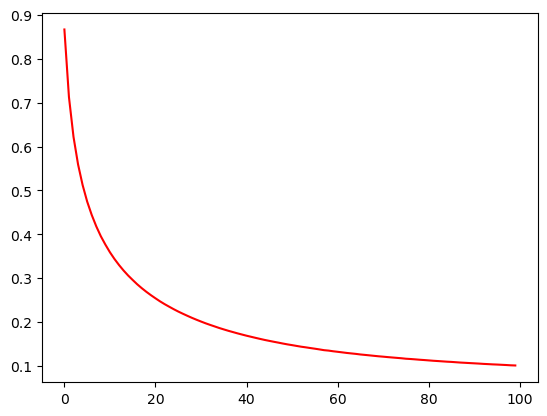

In [18]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'], color='r')
plt.show()

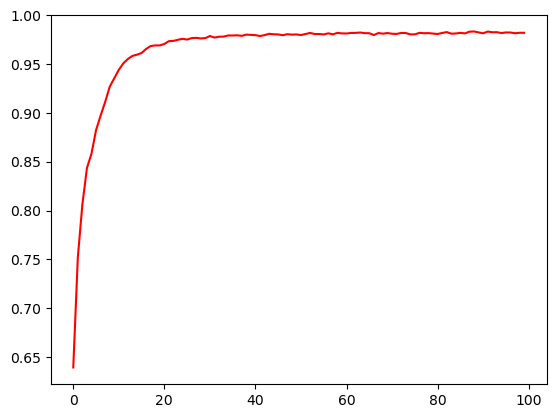

In [19]:
plt.plot(result.history['accuracy'], color='r')
plt.show()

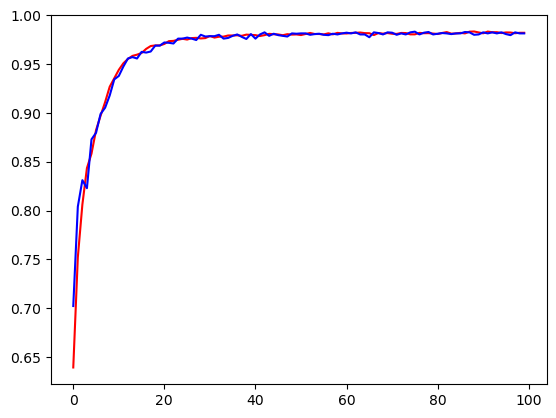

In [20]:
plt.plot(result.history['accuracy'], color='r')
plt.plot(result.history['val_accuracy'], color='b')
plt.show()